<a href="https://colab.research.google.com/github/Anchayadav/AutoTS/blob/main/Tinder_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from wordcloud import WordCloud,STOPWORDS ,ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string

data=pd.read_csv('tinder_google_play_reviews.csv')
print(data.head())

                               reviewId         userName  \
0  55c935f6-11e4-428a-a92e-1670de914105     Sam Stephens   
1  a8c930c6-b2e9-428c-846b-cee4d9ff0482     Greg Holland   
2  92cd769c-0eb5-445a-b970-486a90fc6e2a  The Nut Burglar   
3  d3600779-a0b5-426c-a168-0623c5e7f41f    Imran Mansuri   
4  bfdfc267-2535-41f6-83cb-143450a4b13b  moshood abidemi   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0  Dear tinder why do I have 930,386 people who s...    1.0            0.0   
1  I think its a scam saying if you upgrade youre...    1.0            0.0   
2  Did anyone try the new update the ui before th...    1.0         

In [ ]:
data=data[['content']]


In [ ]:
data.isnull().sum()

content    2
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english")
stopword=set(stopwords.words("english"))

def clean(text):
  text=str(text).lower()
  text =re.sub('\[.*?\]','',text)
  text=re.sub('https?://\s+|www\.\s+','',text)
  text=re.sub('<.*>+','',text)
  text=re.sub('\n','',text)
  text=re.sub('\w/d\w*','',text)
  text=[word for word in text.split() if word not in stopword]
  text =' '.join(text)
  text =[stemmer.stem(word) for word in text.split()]
  text=' '.join(text)
  return text
  data['content'] =data['content'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


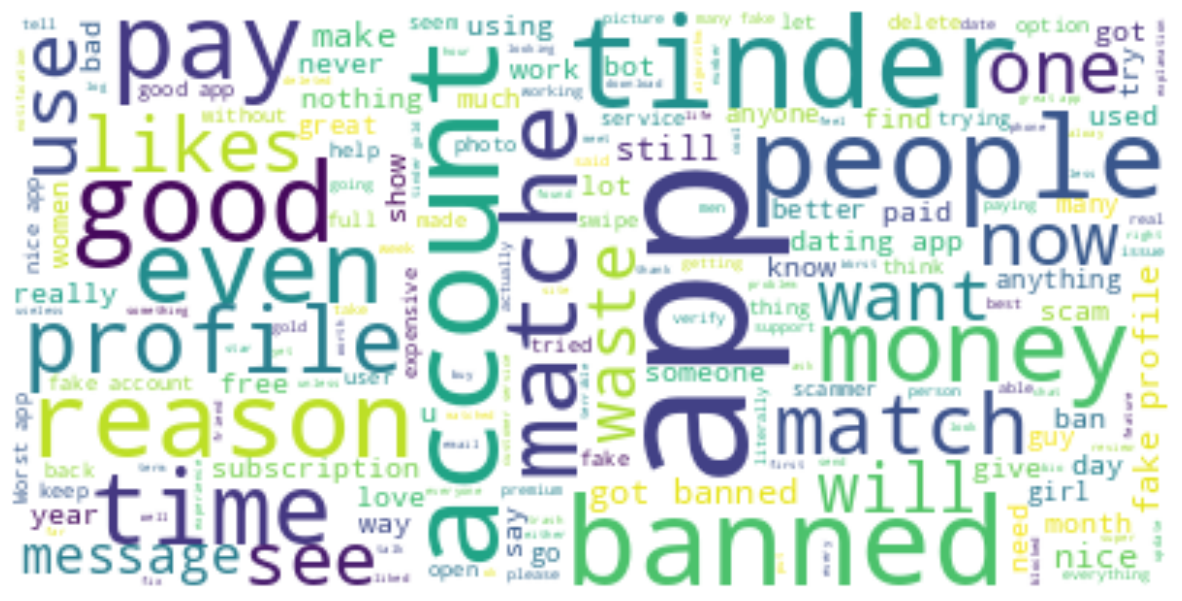

In [ ]:
text =' '.join(i for i in data.content)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments=SentimentIntensityAnalyzer()
data['Positive']=[sentiments.polarity_scores(i)['pos'] for i in data['content']]
data['Negative']=[sentiments.polarity_scores(i)['neg'] for i in data['content']]
data['Neutral'] =[sentiments.polarity_scores(i)['neu']for i in data['content']]
data=data[['content','Positive','Negative','Neutral']]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0  Dear tinder why do I have 930,386 people who s...     0.133     0.000   
1  I think its a scam saying if you upgrade youre...     0.027     0.199   
2  Did anyone try the new update the ui before th...     0.000     0.000   
3  There are 2 bugs encountered recently. 1. Ther...     0.076     0.035   
4  Even if you purchase the subscription or you a...     0.044     0.091   

   Neutral  
0    0.867  
1    0.774  
2    1.000  
3    0.889  
4    0.865  


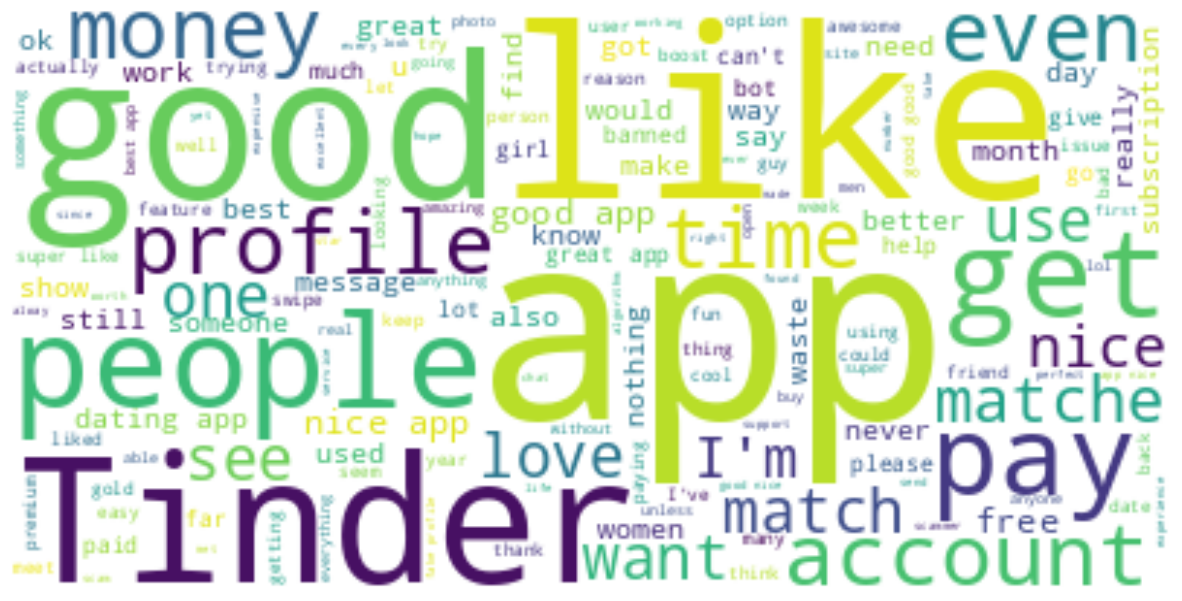

In [ ]:
text=' '.join([i for i in data['content'][data['Positive'] >data['Negative']]])
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopword,background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

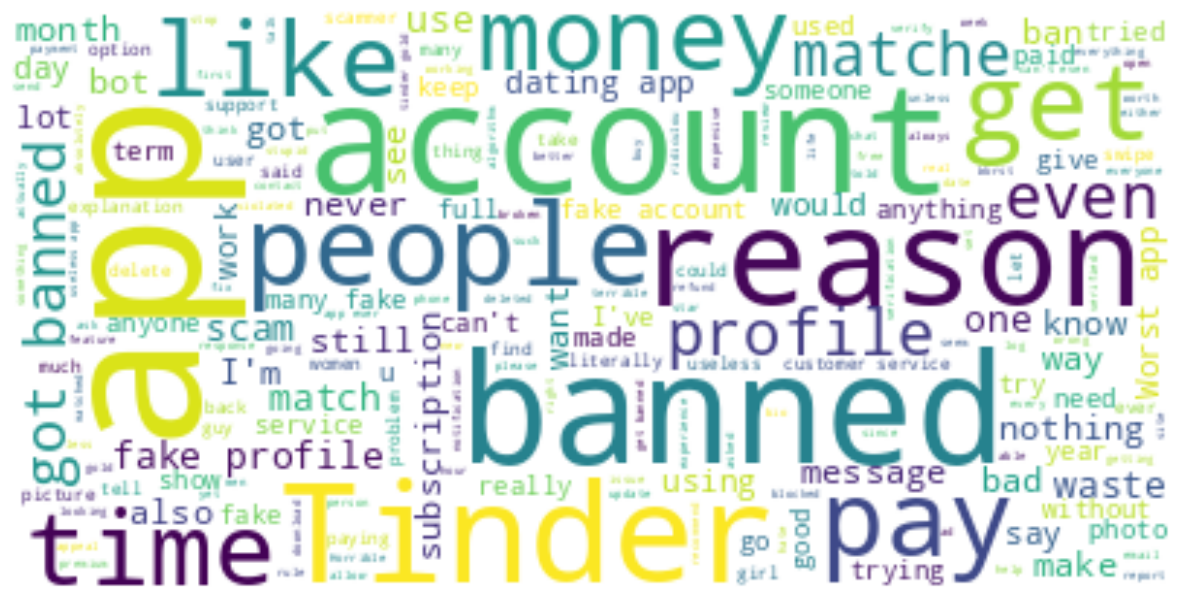

In [ ]:
text=' '.join([i for i in data['content'][data['Negative']  > data['Positive']]])
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopword,background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
x=sum(data['Positive'])
y=sum(data['Negative'])
z=sum(data['Neutral'])
def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print("positive")
  elif(b>a) and (b>c):
    print("negative")
  else:
    print("neutral")
sentiment_score(x,y,z)

neutral


In [ ]:
print("Positive : =",x)
print("Negative : =",y)
print("Neutral : =",z)

Positive : = 11343.101000000046
Negative : = 6817.58600000002
Neutral : = 30176.32800000016
